# 1. Reading Files

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv', parse_dates=['date'])
hol_eve = pd.read_csv('holidays_events.csv', parse_dates=['date'])
oil = pd.read_csv('oil.csv', parse_dates=['date'])
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv', parse_dates=['date'])

test = pd.read_csv('test.csv', parse_dates=['date'])
sample = pd.read_csv('sample_submission.csv')

# 2. Inspecting Files

In [2]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 137.4+ MB


In [4]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [5]:
hol_eve.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [6]:
hol_eve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [7]:
hol_eve['type'].unique(), hol_eve['locale'].unique()

(array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
       dtype=object),
 array(['Local', 'Regional', 'National'], dtype=object))

In [8]:
hol_eve[hol_eve.transferred == True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [9]:
hol_eve[hol_eve.duplicated(subset='date', keep=False)]

,date,type,locale,locale_name,description,transferred
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False
10,2012-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False
11,2012-07-03,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False
...,...,...,...,...,...,...
319,2017-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False
344,2017-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False


In [10]:
hol_eve.locale.replace(['Local', 'Regional', 'National'], [1, 2, 3], inplace=True)
hol_eve = hol_eve.sort_values(by=['date', 'locale'])
hol_eve.drop_duplicates(subset='date', keep='last', inplace=True)
hol_eve.locale.replace([1, 2 ,3], ['Local', 'Regional', 'National'], inplace=True)
hol_eve

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [11]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [12]:
oil = oil.set_index('date')
idx = pd.date_range(oil.index.min(), oil.index.max())
oil = oil.reindex(idx)
oil = oil.reset_index()
oil.columns = ['date', 'dcoilwtico']
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,NaN
...,...,...
1699,2017-08-27,NaN
1700,2017-08-28,46.40
1701,2017-08-29,46.46
1702,2017-08-30,45.96


In [13]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1704 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.8 KB


In [14]:
oil['dcoilwtico'].interpolate(inplace=True)
oil.fillna(method='bfill',inplace=True)
oil

,date,dcoilwtico
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667
...,...,...
1699,2017-08-27,46.816667
1700,2017-08-28,46.400000
1701,2017-08-29,46.460000
1702,2017-08-30,45.960000


<AxesSubplot:xlabel='date'>

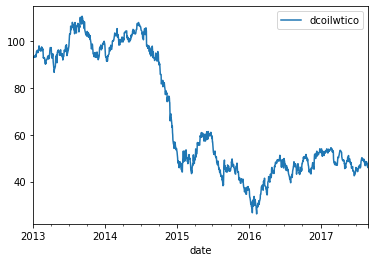

In [15]:
oil.plot('date', 'dcoilwtico')

In [16]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [17]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [18]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [19]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [20]:
def data_cleaning(df):
    df[['type_holiday', 'locale', 'locale_name']] = df[['type_holiday', 'locale', 'locale_name']].fillna('Not_a_holiday')
    df['transferred'] = df['transferred'].fillna(False)
    df.drop('description', axis=1, inplace=True)
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in df.columns.to_numpy():
        if df[col].dtype == 'object' or df[col].dtype == 'datetime64[ns]':
            df[col] = le.fit_transform(df[col])
    return df

In [21]:
def merge_df(df):
    df_store = pd.merge(df, stores, how='left', on='store_nbr')
    df_store_oil = pd.merge(df_store, oil, how='left', on='date')
    df_store_oil_holeve = pd.merge(df_store_oil, hol_eve, how='left', on='date', suffixes=['_shop', '_holiday'])
    #df_store_oil_holeve_transactions = pd.merge(df_store_oil_holeve, transactions, on=['date', 'store_nbr'], how='left')
    df_store_oil_holeve_transactions_cleaned = data_cleaning(df_store_oil_holeve) #df_store_oil_holeve_transactions
    return df_store_oil_holeve_transactions_cleaned

In [22]:
train = merge_df(train)
test = merge_df(test)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          int64  
 2   store_nbr     int64  
 3   family        int32  
 4   sales         float64
 5   onpromotion   float64
 6   city          int32  
 7   state         int32  
 8   type_shop     int32  
 9   cluster       int64  
 10  dcoilwtico    float64
 11  type_holiday  int32  
 12  locale        int32  
 13  locale_name   int32  
 14  transferred   bool   
dtypes: bool(1), float64(3), int32(7), int64(4)
memory usage: 266.2 MB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            28512 non-null  int64  
 1   date          28512 non-null  int64  
 2   store_nbr     28512 non-null  int64  
 3   family        28512 non-null  int32  
 4   onpromotion   28512 non-null  float64
 5   city          28512 non-null  int32  
 6   state         28512 non-null  int32  
 7   type_shop     28512 non-null  int32  
 8   cluster       28512 non-null  int64  
 9   dcoilwtico    28512 non-null  float64
 10  type_holiday  28512 non-null  int32  
 11  locale        28512 non-null  int32  
 12  locale_name   28512 non-null  int32  
 13  transferred   28512 non-null  bool   
dtypes: bool(1), float64(2), int32(7), int64(4)
memory usage: 2.3 MB


In [26]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_shop,cluster,dcoilwtico,type_holiday,locale,locale_name,transferred
0,0,0,1,0,0.0,0.0,18,12,3,13,93.14,3,1,4,False
1,1,0,1,1,0.0,0.0,18,12,3,13,93.14,3,1,4,False
2,2,0,1,2,0.0,0.0,18,12,3,13,93.14,3,1,4,False
3,3,0,1,3,0.0,0.0,18,12,3,13,93.14,3,1,4,False
4,4,0,1,4,0.0,0.0,18,12,3,13,93.14,3,1,4,False


<AxesSubplot:xlabel='date'>

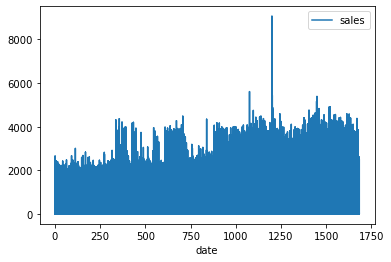

In [36]:
train[np.logical_and(train.store_nbr==1, train.cluster==13)].plot('date', 'sales')

In [35]:
train[np.logical_and(train.store_nbr==1, train.family==0)]

,id,date,store_nbr,family,sales,onpromotion,city,state,type_shop,cluster,dcoilwtico,type_holiday,locale,locale_name,transferred
0,0,0,1,0,0.0,0.0,18,12,3,13,93.140000,3,1,4,False
1782,1782,1,1,0,2.0,0.0,18,12,3,13,93.140000,4,2,14,False
3564,3564,2,1,0,3.0,0.0,18,12,3,13,92.970000,4,2,14,False
5346,5346,3,1,0,3.0,0.0,18,12,3,13,93.120000,4,2,14,False
7128,7128,4,1,0,5.0,0.0,18,12,3,13,93.146667,6,1,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991978,2991978,1679,1,0,1.0,1.0,18,12,3,13,48.810000,5,1,4,False
2993760,2993760,1680,1,0,6.0,6.0,18,12,3,13,48.403333,4,2,14,False
2995542,2995542,1681,1,0,1.0,1.0,18,12,3,13,47.996667,4,2,14,False
2997324,2997324,1682,1,0,1.0,1.0,18,12,3,13,47.590000,4,2,14,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('sales', axis=1), train.sales, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
test_model = DecisionTreeRegressor()
test_model.fit(X_train, y_train)
y_pred = test_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred, y_test))

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(train.drop('sales', axis=1), train.sales)
pred = dtr.predict(test)
pred

In [ ]:
sample

In [ ]:
submission = pd.DataFrame({'id':np.arange(test.id.min(), test.id.max()+1), 'sales':pred})
submission

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
df = pd.read_csv('submission.csv')
df